<h1><center> Monte Carlo Methods:</center></h1>
<h1><center> Transformation, Rejection & Importance Sampling</center></h1>
<h2><center> Gabija Vaisvilaite </center></h2>
$$ \hspace{1cm} $$
<h3><center> 1. </center></h3>

Consider a random variable $X$ with density: $$X = \left \{
  \begin{aligned}
    &c(x^3+8x), && \text{if}\ 0 \leq x \leq 4 \\
    &0, && \text{otherwise}
  \end{aligned} \right.$$

#### $\textbf{(a) i.}$
As $f$ is a density function, we have that $$
\begin{equation}
\begin{split}
\int_{-\infty}^{\infty} f(x) \,dx & = \int_{0}^{4} c \cdot (x^3+8x) \,dx \\
                                  & = \left. c \cdot \big( \frac{x^4}{4}+4x^2 \big) \right|_{0}^{4} \\
                                  & = 128c \\
                                  & = 1
\end{split}
\end{equation}$$ $\\$
And so $ c = \frac{1}{128} $.

#### $\textbf{(a) ii.}$
For $ x \leq 0 $ we have $$ F(x) = \int_{-\infty}^{x} 0 \,dt = 0 $$
For $ 0 < x \leq 4 $ we have $$
\begin{equation}
\begin{split}
F(x) & = \int_{0}^{x} \frac{1}{128} \left( t^3 + 8t \right) \,dt \\
     & = \left. \frac{1}{128} \big( \frac{t^4}{4}+4t^2 \big) \right|_{0}^{4} \\
     & = \frac{1}{512} \big( x^4+16x^2 \big)
\end{split}
\end{equation} $$
For $ 4 < x $ we have $$ F(x) = \int_{-\infty}^{x} f(t) \,dt = 1 $$
Hence, $$
\begin{equation}
  F(x) =
    \begin{cases}
      0 & \text{for $x \leq 0$}\\
      \frac{1}{512}\big( x^4+16x^2 \big) & \text{for $0 < x \leq 4$}\\
      1 & \text{for $x > 4$}
    \end{cases}       
\end{equation} $$

#### $\textbf{(a) iii.}$
Let $$ u = F(x) = \frac{1}{512}\big( x^4+16x^2 \big) $$ for $0 < x \leq 4$. Then we rearrange the equation to obtain $$x^4+16x^2-512u=0$$ and thus we can solve the quadratic equation to get $$x^2= \frac{-16 \pm \sqrt{256 + 4 \cdot 512u}}{2} = -8 + \sqrt{64+512u}$$ since $ u \geq 0$ for all $x$ and $ x \geq 0 $. Hence we deduce that $$ x= \sqrt{-8 + \sqrt{64+512u}} $$ since $x \geq 0$ and so we have that the inverse of $F$ is $$F^{-1}(x) = \sqrt{-8 + \sqrt{64+512x}}$$ for $0 \leq x \leq 4$.

#### $\textbf{(b) i.}$ 
We evaluate the probability density function $f$, the cumulative distribution function $F$ and the inverse $F^{-1}$ with constant $c$ (in the code written as $const$), where the normalizing constant is $c= \frac{1}{128}$ as computed in part $\textbf{(a)}$. We plot both CDF $F$ and the inverse of CDF $F^{-1}$ to make sure we have evaluated the function correctly.

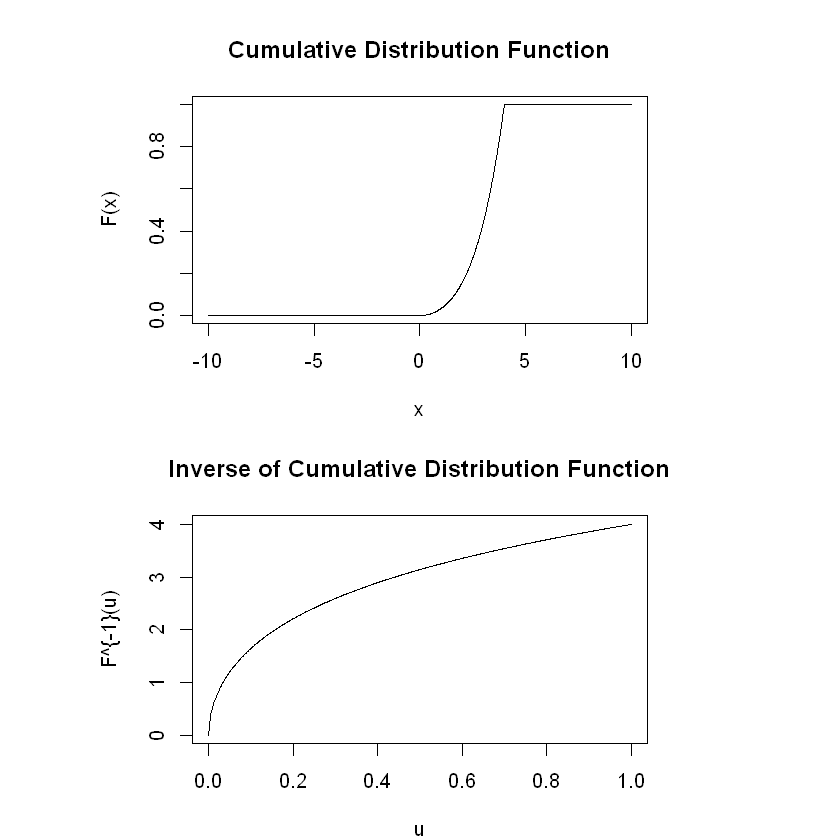

In [1]:
#evaluating f
pdf.f  <- function(const,x){
    ind.low <- (x < 0 & x > 4)
    ind.high <- (x >= 0 & x <= 4)
  
    u <- c()
    u[ind.low] <- 0
    u[ind.high] <- const*((x[ind.high])^3 + 8*x[ind.high])
    u
}

#evaluating F
cdf.f <- function(const,x) {
    ind.low <- (x <= 0)
    ind.med <- (x > 0 & x <= 4)
    ind.high <- (x > 4)
  
    u <- c()
    u[ind.low] <- 0
    u[ind.med] <- const*(0.25*(x[ind.med])^4 + 4*(x[ind.med])^2)
    u[ind.high] <- 1
    u
}

#evaluating F inverse
inv.cdf.f  <- function(const,u){
    ind <- (u >= 0 & u <= 4)
    x  <- c()
    x[ind]  <-  sqrt(-8 + sqrt(64+4*u[ind]/const))
    x
}

pts <- (-1000:1000) / 100
ptu <- (0:1000) / 1000

const = 1/128

#plotting
par(mfrow=c(2,1),mar=c(4,8,4,8))
plot(pts, cdf.f(const,pts), type='l', xlab='x', ylab='F(x)', main='Cumulative Distribution Function')
plot(ptu, inv.cdf.f(const,ptu), type='l', xlab='u', ylab='F^{-1}(u)', main='Inverse of Cumulative Distribution Function')

#### $\textbf{(b) ii. and iii.}$ 
Generating samples from $f$ and plotting the histogram together with the density function $f$. Note that we only plot $0 \leq x \leq 4$, as elsewhere $f(x)=0$.

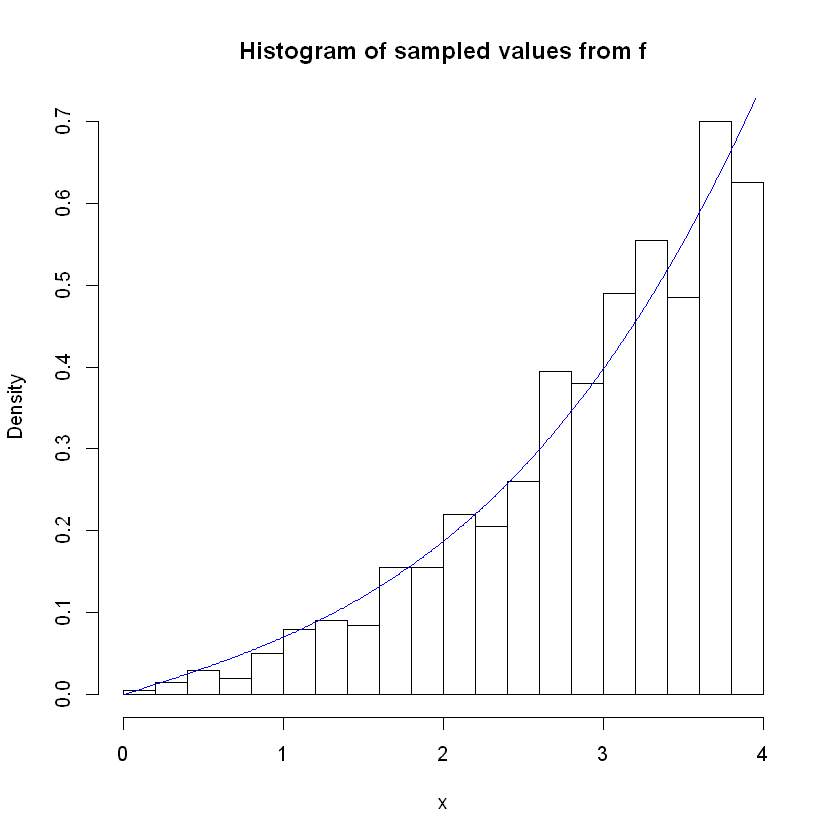

In [2]:
#generating samples from f
samp <- inv.cdf.f(const,runif(1000))

#plotting together with density
par(mfrow=c(1,1))  
hist(samp, n=25, probability=T, xlab='x', main='Histogram of sampled values from f')
lines(pts, pdf.f(const,pts), type = "l", lty = 1, col = "blue")
axis(1, at = seq(0, 4))

#### $\textbf{(b) iv.}$ 
Estimating expectation and variance of $X$ with density $f$.

In [3]:
#expectation
mean(samp)
#variance
var(samp)

[1] 2.959968

[1] 0.6503133

<h3><center> 2. </center></h3>

Consider a random variable $Y$ with density: $$g(y)=c'\cdot \sin^2(\pi y)(y^3+8y)$$ where $c'$ is an unknown constant.

#### $\textbf{(a) i. and ii.}$ 
Evaluating $g$ and plotting with constant $c=1$. Note that this is $\textbf{not}$ a density function as it should be scaled.

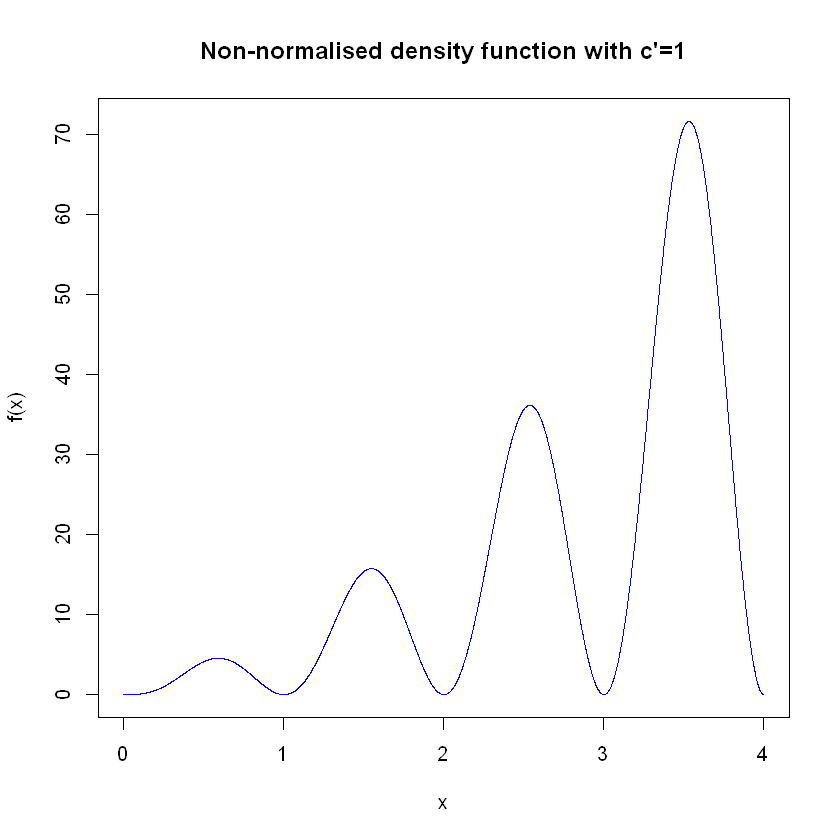

In [4]:
pdf.g <- function(const,y){
  ind.neg <- (y < 0 & y > 4)
  ind.pos <- (y >= 0 & y <= 4)
  
  u <- c()
  u[ind.pos] <- const*(sin(pi*y[ind.pos]))^2*((y[ind.pos])^3+8*y[ind.pos])
  u[ind.neg] <- 0
  u
}

pts <- (0:4000) / 1000 
plot(pts, pdf.g(1,pts), type='l', xlab='x', ylab='f(x)', col ='blue', main="Non-normalised density function with c'=1")

#### $\textbf{(b) i. and ii.}$ 
Now we want to implement a rejection sampler. Observe that for $0 \leq x \leq 4$ we have that for all $x$ the function $g(x)$ is bounded by $128f(x)$ where $f$ is the probability density function from part $\textbf{(a)}$ taken with $c=\frac{1}{128}$. In the plot note that $f(x)$ with constant $1$ is equivalent to $128f(x)$ where $f(x)$ is density with normalized constant.

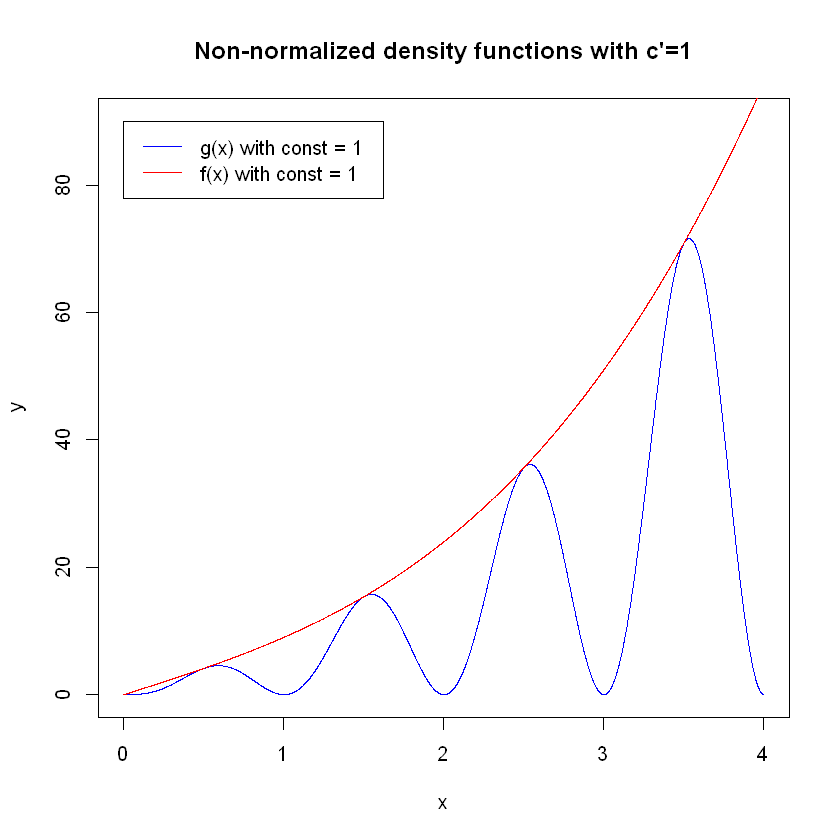

In [5]:
plot(pts, pdf.g(1,pts), type='l', xlab='x', ylab='y', ylim=c(0,90), col ='blue', main="Non-normalized density functions with c'=1")
lines(pts, pdf.f(1,pts), col='red')
legend(0, 90, legend=c("g(x) with const = 1", "f(x) with const = 1"),col=c("blue", "red"), pt.cex = 0.8, lty=1:1, cex=1)

Hence we create the rejection sampler using part $\textbf{(a)}$ with proposal distribution function $128f$ and propose $10000$ samples.

In [6]:
k=10000
xs <- c()
i <- 1
count <- 0
while(count <= k){
    X <- inv.cdf.f(const,runif(1))
    U <- runif(1,0,4)
    if(U < pdf.g(1,X)/pdf.f(1,X)){
        xs[i]  <- X
        i  <- i + 1
    }
    count <- count + 1
}    

#### $\textbf{(b) iv.}$ 
The number of samples we accepted is:

In [7]:
i

[1] 1247

#### $\textbf{(b) iii.}$ 
Estimating mean and variance of $Y$ with density $g$.

In [8]:
mean(xs)
var(xs)

[1] 2.93203

[1] 0.6937962

Plotting density against histogram of more samples to make sure our sampler is correct. The plot confirms it.

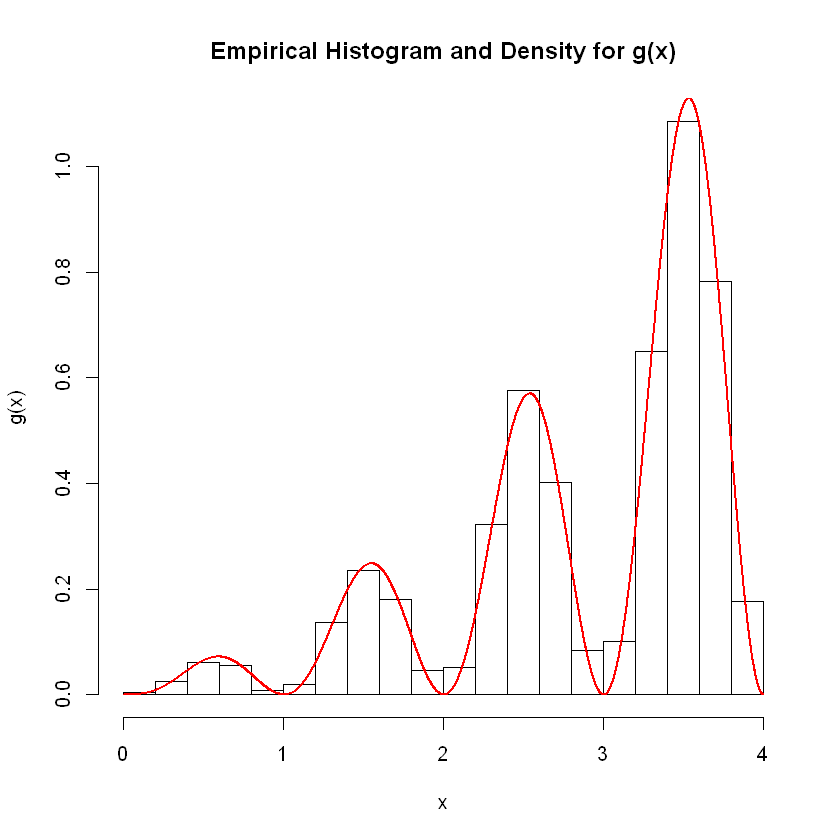

In [9]:
for(i in 1:k) {
    U <- 1
    X <- 3
    while(U > pdf.g(1,X)/pdf.f(1,X)) {
        X <- inv.cdf.f(const,runif(1))
        U <- runif(1,0,4)
        count <- count + 1
    }
    xs[i] <- X
} 
hist(xs, prob=TRUE, main='Empirical Histogram and Density for g(x)',xlab='x',ylab='g(x)', xlim=c(0,4))
const2 = pi^2/(64*pi^2-6)
lines(pts, pdf.g(const2,pts), lwd=2, col='red')

<h3><center> 3. </center></h3>

Consider importance sampling from a standard normal density: $$f_1(x) = \frac{1}{\sqrt{2\pi}}\exp \big(-\frac{1}{2}x^2\big)$$ using a $g_{\sigma}(x)=N(x;0,\sigma^2)$ proposal.

#### $\textbf{(a) i.}$

We have that $$
\begin{equation}
\begin{split}
Var(\omega_{\sigma}(X)) & = Var\left(\frac{\frac{1}{\sqrt{2\pi}} exp \big( \frac{-x^2}{2}\big)}{\frac{1}{\sigma\sqrt{2\pi}} exp \big( \frac{-x^2}{2{\sigma}^2}\big)}\right) \\
                        & = Var\big( \sigma \cdot exp \big( \frac{-1}{2}x^2 + \frac{1}{2}\frac{x^2}{{\sigma}^2}\big) \big) \\
                        & = {\sigma}^2 \big( \mathbb{E} \big( exp \big( -x^2 + \frac{x^2}{{\sigma}^2} \big) \big) - \mathbb{E}^2 \big( exp \big( \frac{-x^2}{2}+ \frac{x^2}{2{\sigma}^2}\big) \big) \big) \\
                        & = {\sigma}^2 \big( \int_{-\infty}^{\infty} \frac{1}{\sigma \sqrt{2\pi}} exp \big( -x^2 \big( 1 - \frac{1}{2 {\sigma}^2} \big) \big) \,dx - \big( \frac{1}{\sigma} \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}} exp \big( \frac{-x^2}{2}\big) \,dx \big)^2 \big) \\
                        & = {\sigma}^2 \int_{-\infty}^{\infty} \frac{1}{\sigma \sqrt{2\pi}} exp \big( -x^2 \big( 1 - \frac{1}{2 {\sigma}^2} \big) \big) \,dx -1 \\
                        & = {\sigma}^2 \frac{1}{\sigma\sqrt{2\pi}} \frac{\sqrt{\pi}}{\sqrt{1-\frac{1}{2{\sigma}^2}}} -1 \\
                        & = \frac{{\sigma}^2}{\sqrt{2{\sigma}^2-1}}-1
\end{split}
\end{equation}$$

#### $\textbf{(a) ii.}$
The variance is finite when $\sigma \neq \pm \sqrt{\frac{1}{2}}$ as then $\sqrt{2{\sigma}^2-1}\neq 0$ and the expression above is not infinite.

#### $\textbf{(a) iii.}$
Variance is minimized when derivative of $$ \frac{{\sigma}^2}{\sqrt{2{\sigma}^2-1}}-1 $$ is $0$, that is, when $$ \frac{2 \sigma \big(2 {\sigma}^2 -1 \big)^{\frac{1}{2}}- \frac{1}{2}\big(2 {\sigma}^2 -1 \big)^{\frac{-1}{2}}4\sigma {\sigma}^2}{2{\sigma}^2-1} = 0 $$ which can be simplified to $$ \frac{2\sigma \big( \sigma - 1\big) \big( \sigma +1 \big)}{\sqrt{2{\sigma}^2-1}^3} =0$$ i.e. the variance is minimized when $\sigma=1$ (as $\sigma >0 $).

#### $\textbf{(b) i.}$
Implementing importance sampler.

In [13]:
sd=2
mean.estimator <- function(n,sd){
    x <- rnorm(n, 0, sd)
    w <- dnorm(x, 0, 1) / (n*dnorm(x,0,sd))
    sample <- data.frame(X=x,W=w)
    return(sum(sample$X * sample$W))
}

#### $\textbf{(b) ii.}$
Implementing importance sampler for different $\sigma$ values ranging from $0$ to $2$, plotting the corresponding mean values and absolute mean values to observe the behaviour of mean estimates.

[1]  0.0000000000  0.0005414511  0.0062083803 -0.0800258800 -0.1853949547
 [6]  0.3711879630  0.0409266046 -0.0617571421  0.0121420900  0.0264575347
[11] -0.0623726783 -0.0091476313  0.0003379776  0.0009193775 -0.0057002774
[16]  0.0004112939  0.0077727390  0.0019091198  0.0011843392  0.0022225706
[21] -0.0024917991 -0.0016078694  0.0022713730 -0.0013787757  0.0043556720
[26]  0.0028637162 -0.0010790164  0.0030438098 -0.0033241722  0.0030765977
[31]  0.0009191956 -0.0001172932 -0.0028527623  0.0046414364  0.0014431290
[36] -0.0006047658 -0.0030694630 -0.0025038648 -0.0013544902  0.0018886095
[41]  0.0010764132

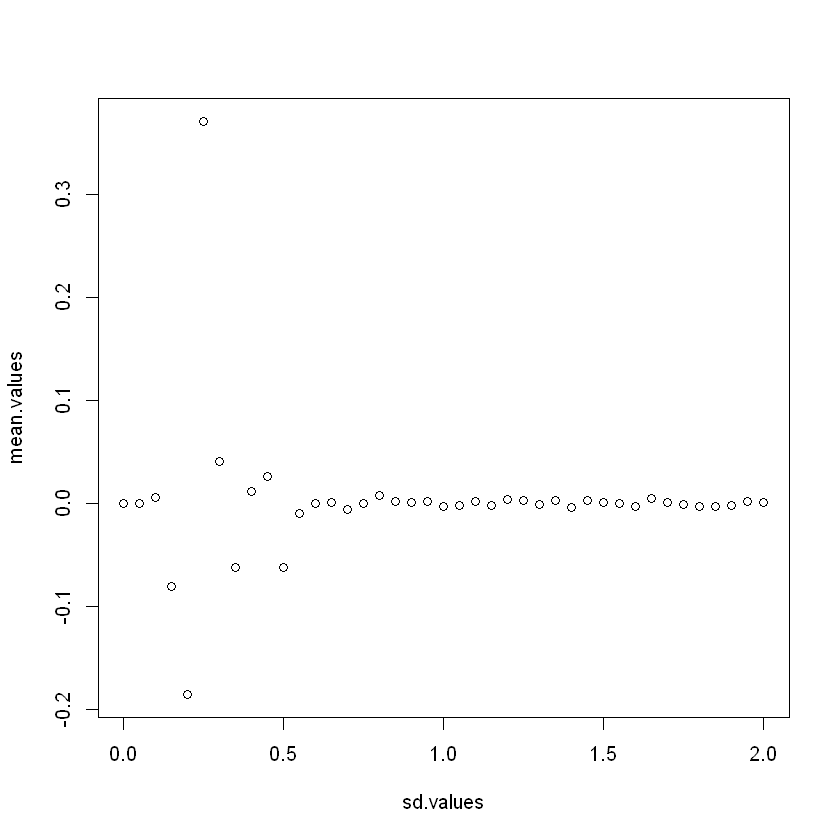

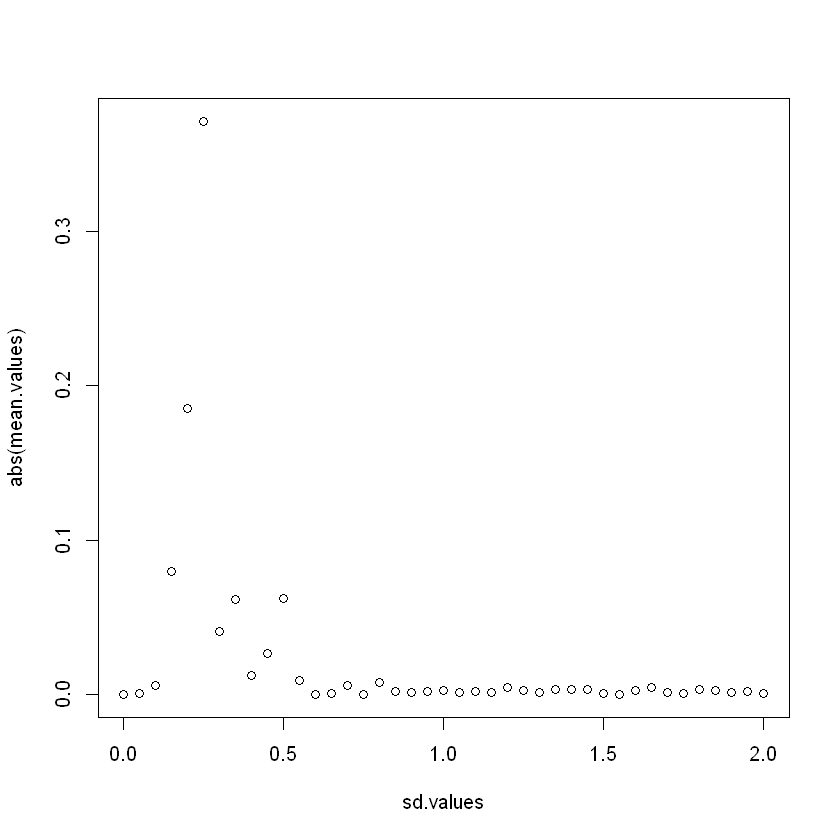

In [14]:
mean.values  <- c()
sd.values  <-   seq(from = 0, to = 2, by = 0.05)
for(i in 1:length(sd.values)){
    mean.values[i]  <- mean.estimator(100000,sd.values[i])
}
mean.values
plot(sd.values, mean.values)
plot(sd.values, abs(mean.values))

Clearly $g$ with different values of $\sigma$ covers $f$ differently, in particular, values of $\sigma$ smaller than $1$ cover $f$ poorly thus the mean estimation is not as accurate.

#### $\textbf{(c) i.}$
Performing repeated simulations and plotting estimated variance of the mean estimations for corresponding $\sigma$ values ranging from $0$ to $2$.

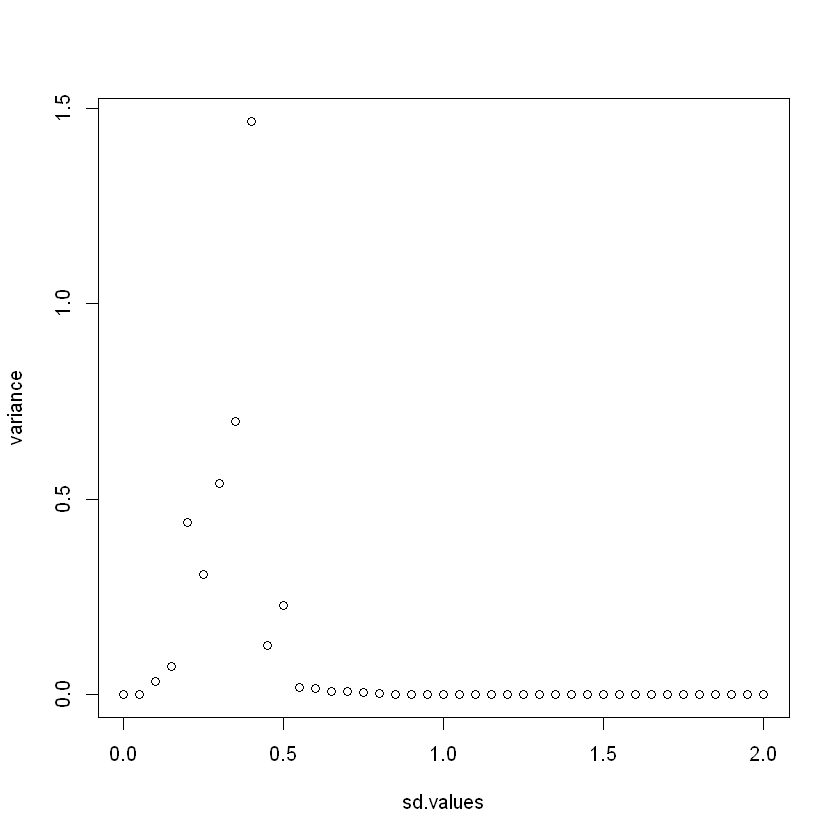

In [12]:
variance  <- c()
for(j in 1:length(sd.values)){
   mean.values  <- c() 
    for(i in 1:100){
        mean.values[i]  <- mean.estimator(1000,sd.values[j])
    }
    variance[j]  <- var(mean.values)
}
plot(sd.values,variance)

#### $\textbf{(d)}$
Choosing a proposal distribution can be really difficult as poor choice of a distribution or a parameter for a distribution can lead to poor estimators.